In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install ts2vg

In [3]:
!pip install igraph

In [4]:
!pip install pycairo
!pip install cairocffi

In [5]:
!pip install tabulate

In [6]:
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
from tabulate import tabulate

In [7]:
########################## TASK 1 ################################

In [8]:
def find_subject_no(file):
    '''
    Usage- Find the subject number for each file read
    Parameters- {file}: whole path of the file
    '''
    
    subject = re.findall(r'\d+', file)
    if len(subject) == 0:
        return 1
    elif len(subject) > 1:
        return int(subject[-2]) + 1
    else:
        return int(subject[-1]) + 1
    

In [9]:
'''
                    This is where the program starts.

Note: 
I have created seperate folders for each of the Activities (Folder Names: Running, Walking, Climbing up & Climbing down) &
kept all the 15 subjects chest csv files inside each of the respective folders.

In the 'folder_path' variable, put the whole path where all the above activity-wise folders are extracted.

'''

## Path where all the Activity-wise folders are located...Change the path accordingly
folder_path = r'C:\Users\HP\Documents\FDA\Project 3'

# Change the current working directory as the above folder path
os.chdir(folder_path)

# Creating a common dataframe for Walking

walking_df = pd.DataFrame()

for file in os.listdir("Walking"):
    if 'acc_walking' in file and file.endswith('csv'):
        walking = pd.read_csv(os.path.join("Walking",file))
        
        subject_no = find_subject_no(file)
            
        walking['Subject'] = subject_no
        walking_df = pd.concat([walking_df,walking], ignore_index = True)


# Creating a common dataframe for Running

running_df = pd.DataFrame()

for file in os.listdir("Running"):
    if 'acc_running' in file and file.endswith('csv'):
        running = pd.read_csv(os.path.join("Running",file))
        
        subject_no = find_subject_no(file)
            
        running['Subject'] = subject_no
        running_df = pd.concat([running_df,running], ignore_index = True)


# Creating a common dataframe for Climbing Down

climbdown_df = pd.DataFrame()

for file in os.listdir("Climbing down"):
    if 'acc_climbingdown' in file and file.endswith('csv'):
        climbdown = pd.read_csv(os.path.join("Climbing down",file))
        
        subject_no = find_subject_no(file)
            
        climbdown['Subject'] = subject_no
        climbdown_df = pd.concat([climbdown_df,climbdown], ignore_index = True)

        
climbdown_df = climbdown_df.sort_values(["Subject", "attr_time"], ascending = (True,True))


# Creating a common dataframe for Climbing Up

climbup_df = pd.DataFrame()

for file in os.listdir("Climbing up"):
    if 'acc_climbingup' in file and file.endswith('csv'):
        climbup = pd.read_csv(os.path.join("Climbing up",file))
        
        subject_no = find_subject_no(file)
            
        climbup['Subject'] = subject_no
        climbup_df = pd.concat([climbup_df,climbup], ignore_index = True)


climbup_df = climbup_df.sort_values(["Subject", "attr_time"], ascending = (True,True))

In [10]:
# Create a new df to store all the computations in a tabular form

tabular_task1_cols =['Method', 'Subject', 'Accelerometer axis', 'Average degree', 'Network Diameter', 'Average path length', 'Activity']

tabular_task1 = pd.DataFrame(columns = tabular_task1_cols)


In [11]:
def create_temp_df(activity):

    '''
    Usage- Create a temporary dataframe for it's equivalent activity df
    Parameters- {activity}: Name of the activity
    Return value- Dataframe based on the activity type
    '''

    if activity == 'Walking':
        return walking_df
    elif activity == 'Running':
        return running_df
    elif activity == 'Climbing up':
        return climbup_df
    elif activity == 'Climbing down':
        return climbdown_df
    

In [12]:
def cal_graph_values_insert_data(g, temp_df, attribute, subject, activity, tabular_task1, method):
    
    '''
    Usage- Calculate various graph values and insert the data into the dataframe
    Parameters- 
    {g}: Graph created
    {temp_df}: temporary dataframe
    {attribute}: X,Y or Z
    {subject}: Subject Number
    {activity}: Activity type
    {tabular_task1}: Output dataframe
    {method}: HVG or NVG
    Return Value- {tabular_task1}
    '''
    
    if attribute == 'X':
        g.build(temp_df['attr_x'][1000:2024])
    elif attribute == 'Y':
        g.build(temp_df['attr_y'][1000:2024])
    elif attribute == 'Z':
        g.build(temp_df['attr_z'][1000:2024])
    
    
    ig_g = g.as_igraph()
    

    nvg_degree = np.mean(ig_g.degree())
    nvg_diameter = ig_g.diameter()
    nvg_path_length = ig_g.average_path_length()
    
    
    insert_data = {'Method': method, 'Subject': subject, 'Accelerometer axis' : 'X', 'Average degree' : nvg_degree, 
        'Network Diameter' : nvg_diameter, 'Average path length' : nvg_path_length, 'Activity' : activity}
    
    tabular_task1 = tabular_task1.append(insert_data, ignore_index = True)
    
    
    return tabular_task1

In [13]:
# Create a function to create NVG, HVG & calculate the computations

def NVG_HVG(subject, activity, tabular_task1, method):

    '''
    Usage- Calculate various graph values and insert the data into the dataframe
    Parameters- 
    {subject}: Subject Number
    {activity}: Activity type
    {tabular_task1}: Output dataframe
    {method}: HVG or NVG
    Return Value- {tabular_task1}
    '''
    
    temp_df = create_temp_df(activity)

    if method == 'NVG':
        g = NaturalVG()
    elif method == 'HVG':
        g = HorizontalVG()   
    
    temp_df = temp_df[temp_df['Subject'] == subject]
    temp_df = temp_df.reset_index(drop = True)
    
    attributes = ['X','Y','Z']
    
    for attribute in attributes:
        tabular_task1 = cal_graph_values_insert_data(g, temp_df, attribute, subject, activity, tabular_task1, method)

    
    return tabular_task1

In [14]:
# Call the above NVG_HVG function for all Activities & for each NVG & HVG

v=activities = ['Walking', 'Running', 'Climbing up', 'Climbing down']
for activity in activities:
    for i in range(1,16):
        tabular_task1 = NVG_HVG(i,activity,tabular_task1, "NVG")
        tabular_task1 = NVG_HVG(i,activity,tabular_task1, "HVG")


In [15]:
# Final tabular for all the above activities

print(tabulate(tabular_task1, headers = 'keys', tablefmt = 'pretty', showindex=False))

+--------+---------+--------------------+----------------+------------------+---------------------+---------------+
| Method | Subject | Accelerometer axis | Average degree | Network Diameter | Average path length |   Activity    |
+--------+---------+--------------------+----------------+------------------+---------------------+---------------+
|  NVG   |    1    |         X          |  11.451171875  |        10        |  4.441492164589443  |    Walking    |
|  NVG   |    1    |         X          |  11.986328125  |        9         | 4.2410496089931575  |    Walking    |
|  NVG   |    1    |         X          |   8.5703125    |        10        |  4.897721545087976  |    Walking    |
|  HVG   |    1    |         X          |  3.958984375   |        26        | 11.578023811705767  |    Walking    |
|  HVG   |    1    |         X          |  3.951171875   |        22        | 10.666252367424242  |    Walking    |
|  HVG   |    1    |         X          |   3.95703125   |        23    

In [16]:
# Function to select specific data & plot a scatterplot

def scatter_nvg_hvg(method, axis, act1, act2):
    
    '''
    Usage- Create scatter plots for HVG & NVG
    Parameters- 
    {method}: HVG or NVG
    {axis}: X, Y or Z
    {act1}: Activity 1 
    {act2}: Activity 2 
    '''
    
    scatter_df = tabular_task1[(tabular_task1["Method"] == method) & (tabular_task1["Accelerometer axis"] == axis)
                     & ( (tabular_task1["Activity"] == act1) | (tabular_task1["Activity"] == act2) )]
    
    sns.scatterplot(x= scatter_df['Average degree'], y=scatter_df['Network Diameter'], hue = scatter_df['Activity'])
    
    title = method + " " + axis + " Axis"
    plt.title(title)
    plt.show()


				 RUNNING & WALKING

					 HVG


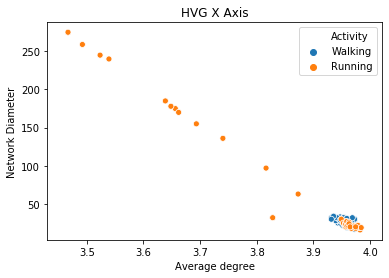

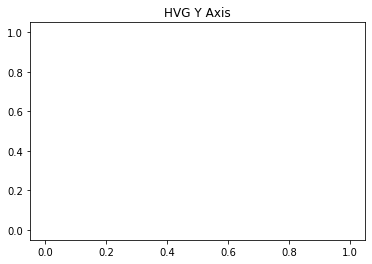

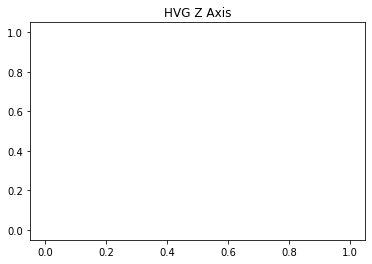


					 NVG


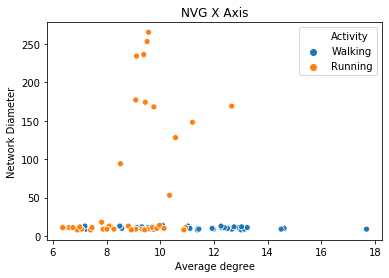

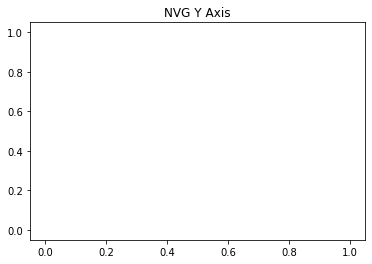

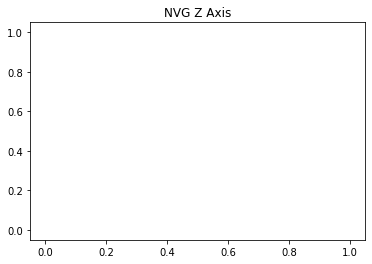

In [17]:
# Scatter plot for Running & Walking. Call the above function created

axis = ['X', 'Y', 'Z']

print("\t\t\t\t RUNNING & WALKING")
print()
print("\t\t\t\t\t HVG")
for ax in axis:
    scatter_nvg_hvg('HVG', ax, 'Running', 'Walking')

print()
print("\t\t\t\t\t NVG")
for ax in axis:
    scatter_nvg_hvg('NVG', ax, 'Running', 'Walking')

				 CLIMBING UP & CLIMBING DOWN

					 HVG


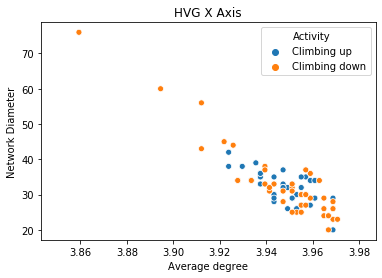

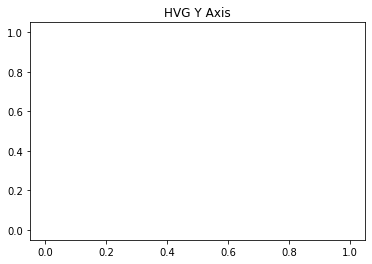

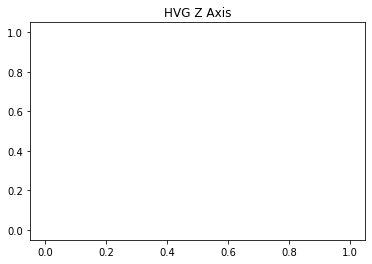


					 NVG


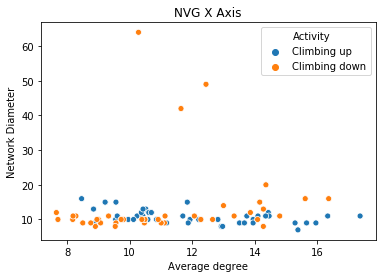

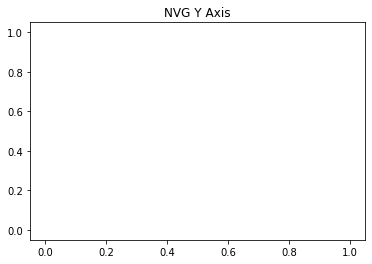

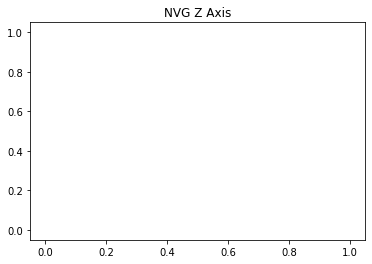

In [18]:
# Scatter Plot for Climbing Up & Climbing Down

axis = ['X', 'Y', 'Z']

print("\t\t\t\t CLIMBING UP & CLIMBING DOWN")
print()
print("\t\t\t\t\t HVG")
for ax in axis:
    scatter_nvg_hvg('HVG', ax, 'Climbing up', 'Climbing down')

print()
print("\t\t\t\t\t NVG")
for ax in axis:
    scatter_nvg_hvg('NVG', ax, 'Climbing up', 'Climbing down')


In [19]:
###################### TASK 2 #########################

In [20]:
## Define various functions for Computations

def s_entropy(freq_list):
    '''
    Usage- Calculate Entrophy based on the list of frequencies
    Parameters- 
    {freq_list}: List of frequencies
    {return}: entropy value
    '''
  
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    '''
    Usage- Calculate Ordinal Patterns
    Parameters- 
    {ts}: Temporary dataframe for each of the axis
    {embdim}: Embeded dimension value
    {embdelay}: Embeded Delay time
    {return}: list of ordinal patterns
    '''
    
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    '''
    Usage- Calculate Ordinal Patterns
    Parameters- 
    {x}: value for which hash needs to found
    {return}: hash value
    '''
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    '''
    Usage- Calculate Entropy
    Parameters- 
    {op}: Ordinal Patterns array
    {return}: entropy value
    '''
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    '''
    Usage- Calculate complexity based on Ordinal Patterns
    Parameters- 
    {op}: Ordinal Patterns array
    {return}: complexity value
    '''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [21]:
# Create a new empty df to store all the below computations in a tabular form

tabular_task2_cols = ['Subject', 'Accelerometer axis', 'Signal length', 'Dimension', 'Delay', 'Permutation entropy',
                     'Complexity', 'Activity']

tabular_task2 = pd.DataFrame(columns = tabular_task2_cols)

In [22]:
def entrophy_complexity(activity, subject, tabular_task2):
    '''
    Usage- calculate Entrophy & Complexity & insert the equivalent results into the final table
    Parameters- 
    {activity}: Activity name
    {subject}: Subject number
    {tabular_task2}: Output Dataframe 
    {return}: Output Dataframe
    '''

    embed_dim = [3,4,5,6]
    embed_delay = [1,2,3]
    signal_length = [1024, 2048, 4096]
    
    temp_df = create_temp_df(activity)
      
    temp_df = temp_df[temp_df['Subject'] == subject]
    temp_df = temp_df.reset_index(drop = True)

    for dim in embed_dim:
        for delay in embed_delay:
            for length in signal_length:
                for axis in ['X', 'Y', 'Z']:
                    if axis == "X":
                        op_walking = ordinal_patterns(temp_df['attr_x'][1000:1000 + length],dim,delay)
                    elif axis == "Y":
                        op_walking = ordinal_patterns(temp_df['attr_y'][1000:1000 + length],dim,delay)
                    elif axis == "Z":
                        op_walking = ordinal_patterns(temp_df['attr_z'][1000:1000 + length],dim,delay)
                
                    entropy_axis = p_entropy(op_walking)
                    complexity_axis = complexity(op_walking)
            
                    insert_data = {'Subject': subject, 'Accelerometer axis' : axis, 'Signal length' : length, 
                               'Dimension' : dim, 'Delay' : delay, 'Permutation entropy' : entropy_axis,
                               'Complexity': complexity_axis, 'Activity' : activity}
        
                    tabular_task2 = tabular_task2.append(insert_data, ignore_index = True)
    
    return tabular_task2

In [23]:
# Call the all the above functions for each of the activities

activities = ['Walking', 'Running', 'Climbing up', 'Climbing down']

for activity in activities:
    for subject in range(1,16):
        tabular_task2 = entrophy_complexity(activity, subject, tabular_task2)

In [24]:
# Display the Final Table

#tabular_task2
print(tabulate(tabular_task2, headers = 'keys', tablefmt = 'pretty', showindex=False))

+---------+--------------------+---------------+-----------+-------+---------------------+------------------------+---------------+
| Subject | Accelerometer axis | Signal length | Dimension | Delay | Permutation entropy |       Complexity       |   Activity    |
+---------+--------------------+---------------+-----------+-------+---------------------+------------------------+---------------+
|    1    |         X          |     1024      |     3     |   1   |  0.83593135366074   |   0.1334837071874079   |    Walking    |
|    1    |         Y          |     1024      |     3     |   1   | 0.7780952779246245  |  0.16651650074125418   |    Walking    |
|    1    |         Z          |     1024      |     3     |   1   | 0.8856656907692442  |   0.0972051135398041   |    Walking    |
|    1    |         X          |     2048      |     3     |   1   | 0.8268261304001304  |  0.13958180203742832   |    Walking    |
|    1    |         Y          |     2048      |     3     |   1   | 0.76364

In [25]:
# Create a function for scatter plots

def scatter_ent_cmp(axis, dim, act1, act2):
    
    scatter_df = tabular_task2[(tabular_task2["Accelerometer axis"] ==  axis) &  (tabular_task2["Signal length"] ==  4096) 
                               & (tabular_task2["Delay"] == 1) &  (tabular_task2["Dimension"] == dim)  
                               & ( (tabular_task2["Activity"] == 'Walking') | (tabular_task2["Activity"] == 'Running') ) ]
    #scatter_df
    
    sns.scatterplot(x= scatter_df['Permutation entropy'], y=scatter_df['Complexity'], hue = scatter_df['Activity'])
    
    title = "Accelerometer axis = " + axis + ", Signal Length = 4096, Embedded Delay = 1 ,and Embedded Dimension = " + str(dim)
    plt.title(title)
    plt.show()

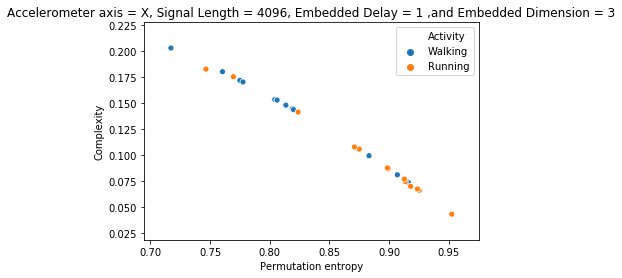

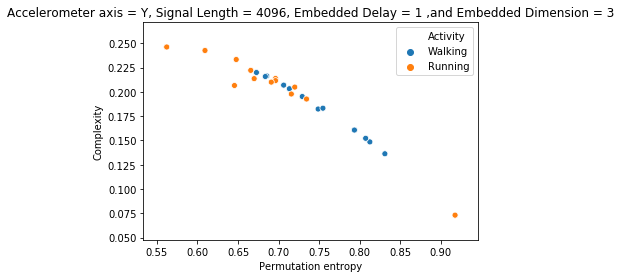

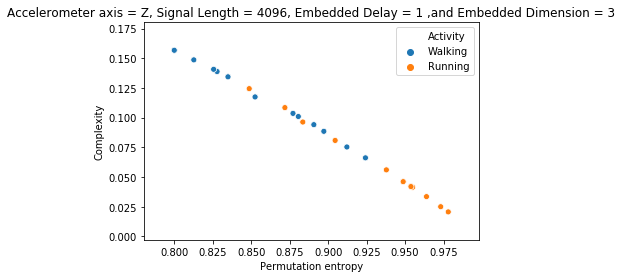

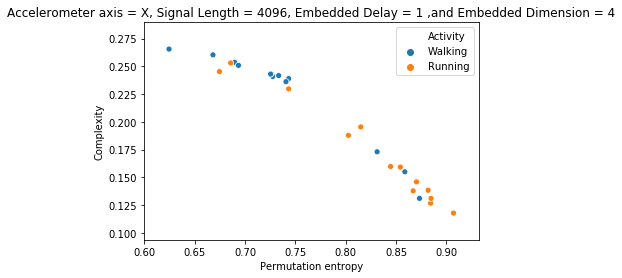

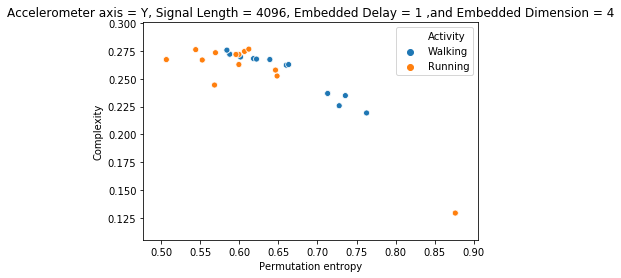

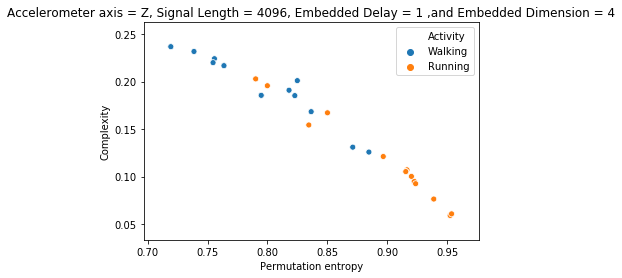

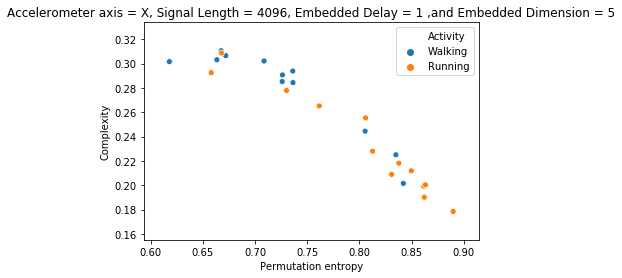

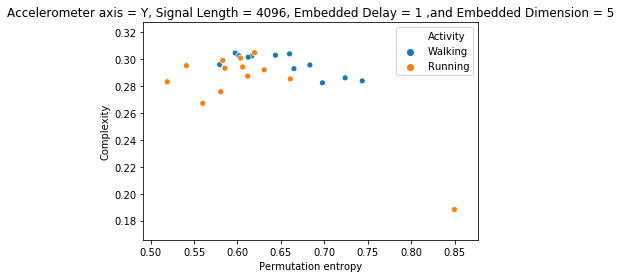

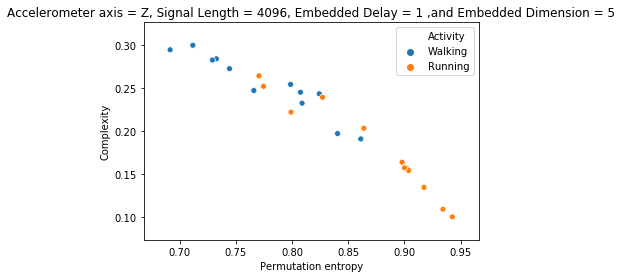

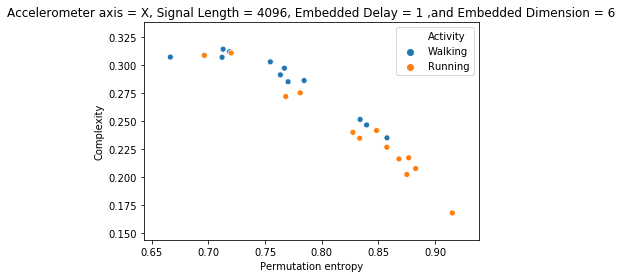

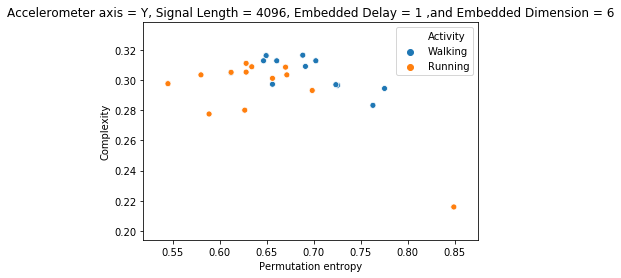

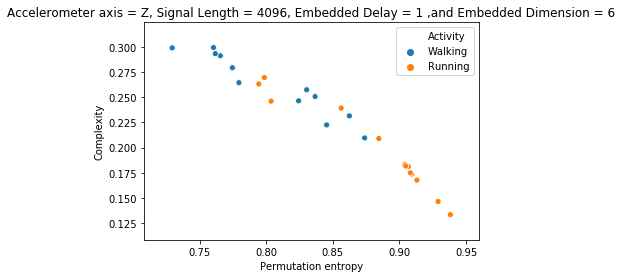

In [26]:
## Scatter Plots for Walking & Running

dimensions = [3,4,5,6]
axis = ['X', 'Y', 'Z']
for dim in dimensions:
    for ax in axis:
        scatter_ent_cmp(ax, dim, 'Walking', 'Running')

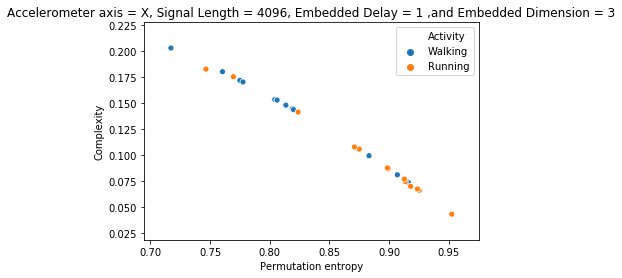

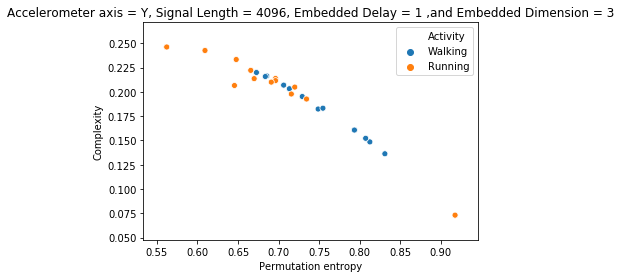

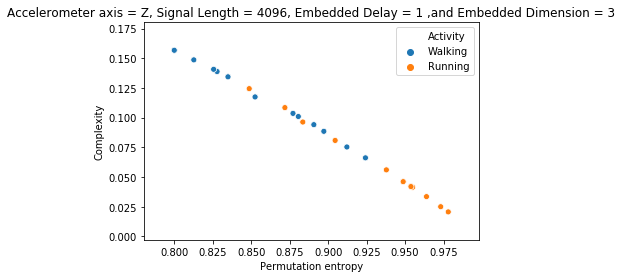

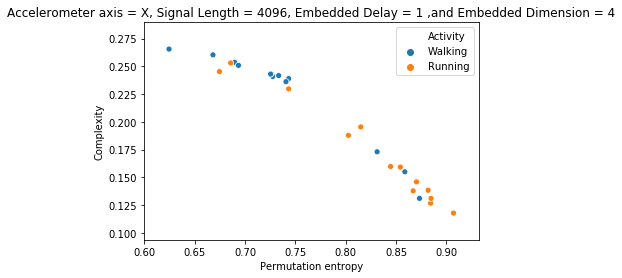

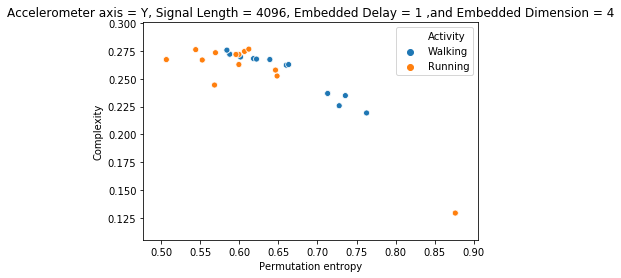

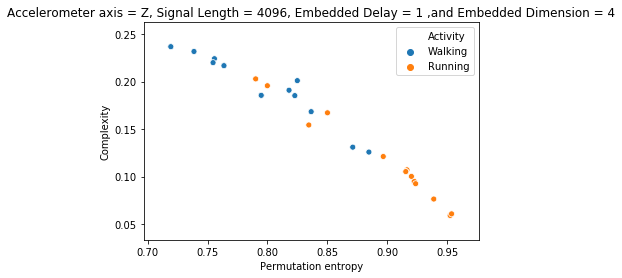

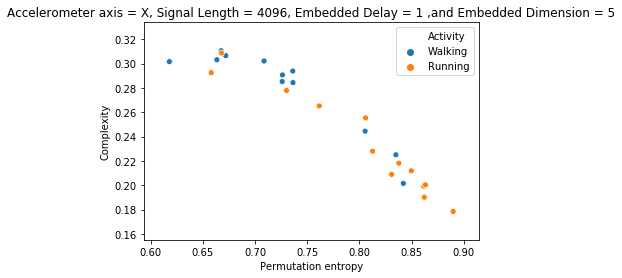

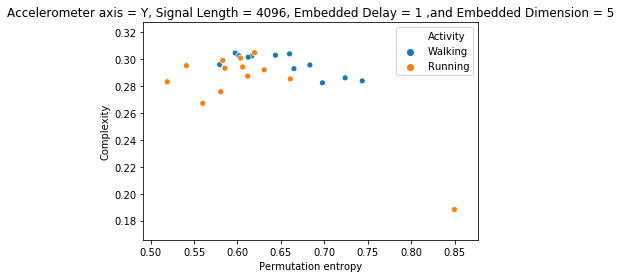

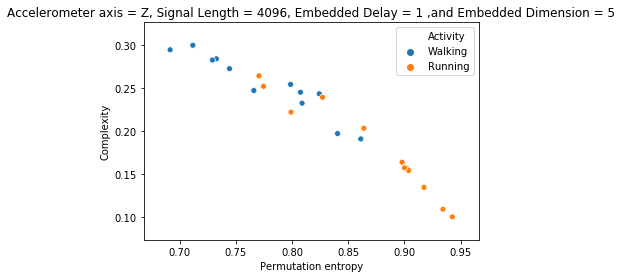

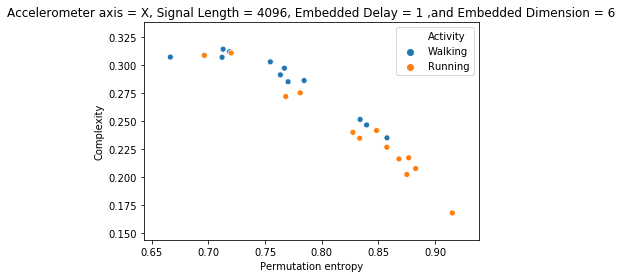

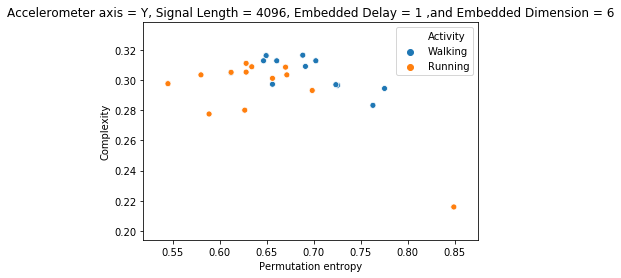

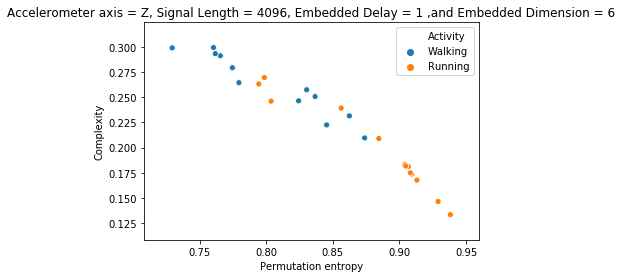

In [27]:
## Scatter Plots for Climbing up & Climbing down

dimensions = [3,4,5,6]
axis = ['X', 'Y', 'Z']
for dim in dimensions:
    for ax in axis:
        scatter_ent_cmp(ax, dim, 'Climbing up', 'Climbing down')